In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

data = pd.read_csv('./Delhi_air_quality_remove_index_col.csv')
matplotlib.style.use('ggplot')
figure(figsize=(6, 20))

<Figure size 600x2000 with 0 Axes>

<Figure size 600x2000 with 0 Axes>

In [10]:
data.head(10)

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,10/7/2017 17:00,46.17,134.06,10.98,31.61,10.20,29.71,0.16,26.60,53.64,0.09,1.08,0.09,212
1,10/7/2017 18:00,41.66,10.07,11.83,23.03,12.79,28.07,0.21,15.10,36.68,0.30,3.51,0.09,206
2,10/7/2017 19:00,34.13,120.27,14.89,22.16,14.31,32.91,0.22,15.14,28.09,0.48,4.17,0.09,202
3,10/7/2017 20:00,57.54,113.44,24.30,42.94,18.28,38.71,0.23,18.61,27.71,0.30,2.42,0.09,197
4,10/7/2017 21:00,78.04,105.27,25.18,24.65,17.00,58.68,0.35,16.42,16.99,0.43,2.88,0.08,195
5,10/7/2017 22:00,77.73,154.58,20.10,39.25,15.18,63.57,0.26,21.06,21.00,0.68,2.74,0.09,197
6,10/7/2017 23:00,97.44,148.58,13.64,25.40,14.08,46.95,0.24,20.04,20.99,0.62,2.70,0.09,199
7,10/8/2017 0:00,74.38,68.55,14.82,28.96,12.63,42.31,0.19,28.75,27.19,0.36,2.49,0.08,199
8,10/8/2017 1:00,68.83,111.49,24.79,20.64,15.74,41.29,0.21,15.89,18.90,0.41,2.42,0.08,201
9,10/8/2017 2:00,71.32,144.10,33.60,28.20,18.10,34.09,0.23,24.47,20.11,0.27,2.27,0.09,206


In [13]:
data.tail(10)

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
23926,6/30/2020 15:00,47.39,107.10,5.69,17.49,14.70,30.54,0.82,10.94,60.19,1.46,10.94,0.16,103
23927,6/30/2020 16:00,50.68,113.47,5.78,16.59,14.22,31.31,0.85,11.29,62.55,1.46,12.44,0.12,103
23928,6/30/2020 17:00,48.06,115.63,6.14,17.02,15.18,31.36,0.85,11.22,60.22,1.51,12.60,0.16,102
23929,6/30/2020 18:00,47.04,120.11,6.25,19.53,16.15,31.08,0.89,11.09,56.14,1.62,15.26,0.19,100
23930,6/30/2020 19:00,44.05,120.06,6.58,21.16,17.17,31.21,0.90,10.92,50.22,1.58,20.39,0.54,96
23931,6/30/2020 20:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97
23932,6/30/2020 21:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99
23933,6/30/2020 22:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101
23934,6/30/2020 23:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,1.60,16.79,0.85,102
23935,7/1/2020 0:00,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101


In [11]:
def getMaxNaNIndex(data, column):
    print(data[column].index[data[column].apply(np.isnan)].max())
for i in data.columns.tolist():
    if i == 'Datetime' or i == 'City':
        continue
    if i == 'AQI_Bucket':
        break
    print(f'{i}: ', end = '')
    getMaxNaNIndex(data, i)

PM2.5: nan
PM10: nan
NO: nan
NO2: nan
NOx: nan
NH3: nan
CO: nan
SO2: 52
O3: nan
Benzene: nan
Toluene: nan
Xylene: 6284
AQI: nan


In [43]:
df = data
df["Datetime"] = df["Datetime"].apply(pd.to_datetime)
df = df.set_index('Datetime')
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2017-10-07 17:00:00,46.17,134.06,10.98,31.61,10.20,29.71,0.16,26.60,53.64,0.09,1.08,0.09,212
2017-10-07 18:00:00,41.66,10.07,11.83,23.03,12.79,28.07,0.21,15.10,36.68,0.30,3.51,0.09,206
2017-10-07 19:00:00,34.13,120.27,14.89,22.16,14.31,32.91,0.22,15.14,28.09,0.48,4.17,0.09,202
2017-10-07 20:00:00,57.54,113.44,24.30,42.94,18.28,38.71,0.23,18.61,27.71,0.30,2.42,0.09,197
2017-10-07 21:00:00,78.04,105.27,25.18,24.65,17.00,58.68,0.35,16.42,16.99,0.43,2.88,0.08,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,1.63,17.83,0.86,97
2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,1.72,18.06,1.16,99
2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,1.66,16.17,1.18,101


<AxesSubplot:xlabel='Datetime'>

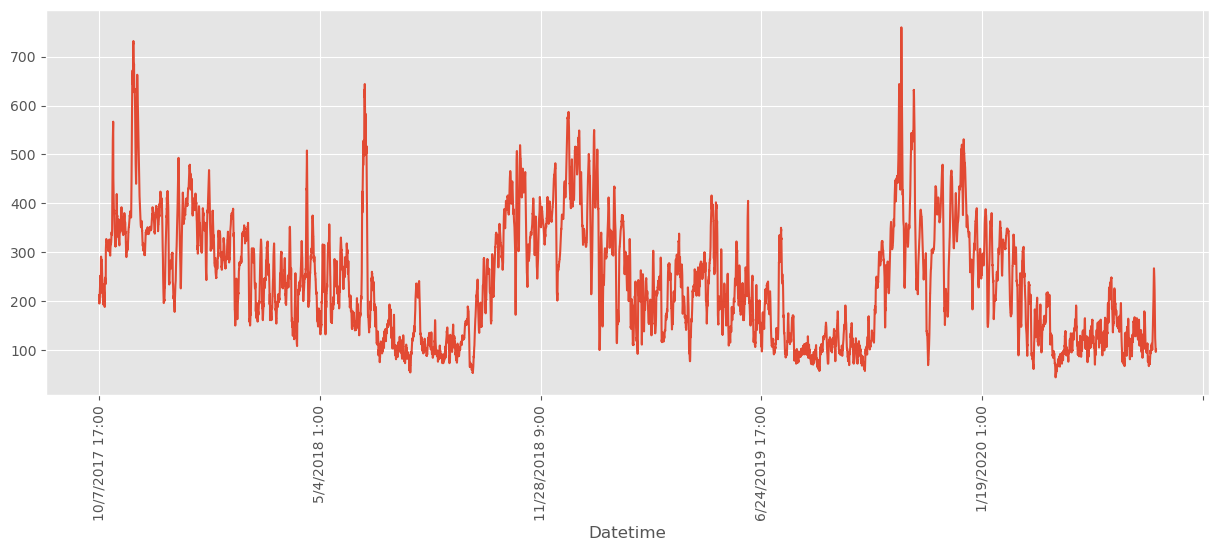

In [28]:
df["AQI"].plot(rot=90, figsize=(15,5))

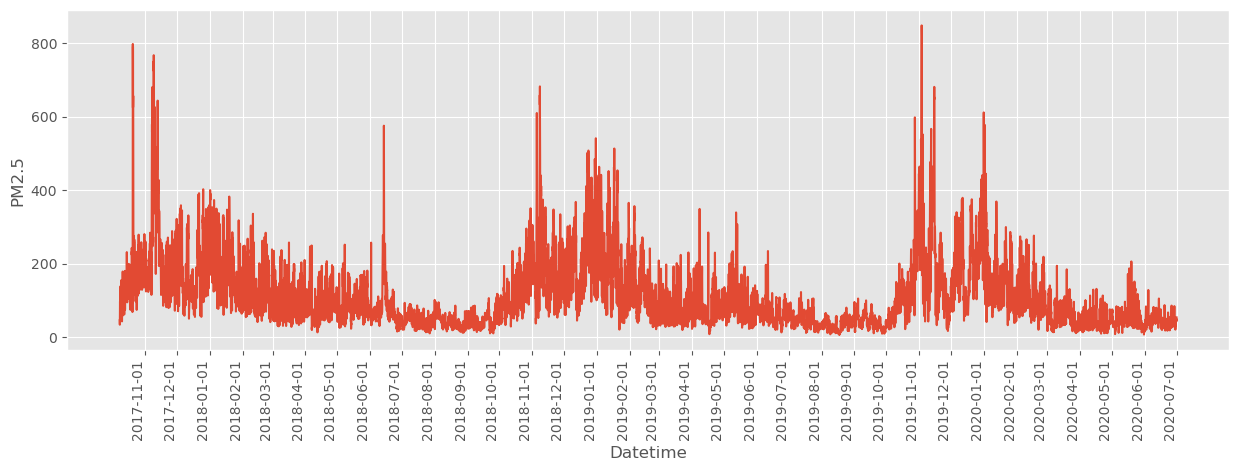

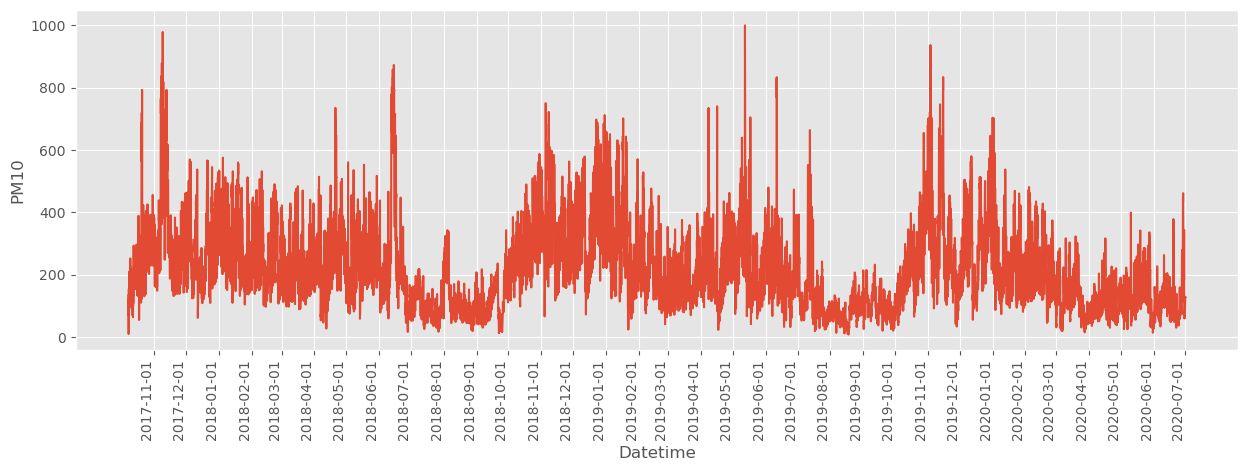

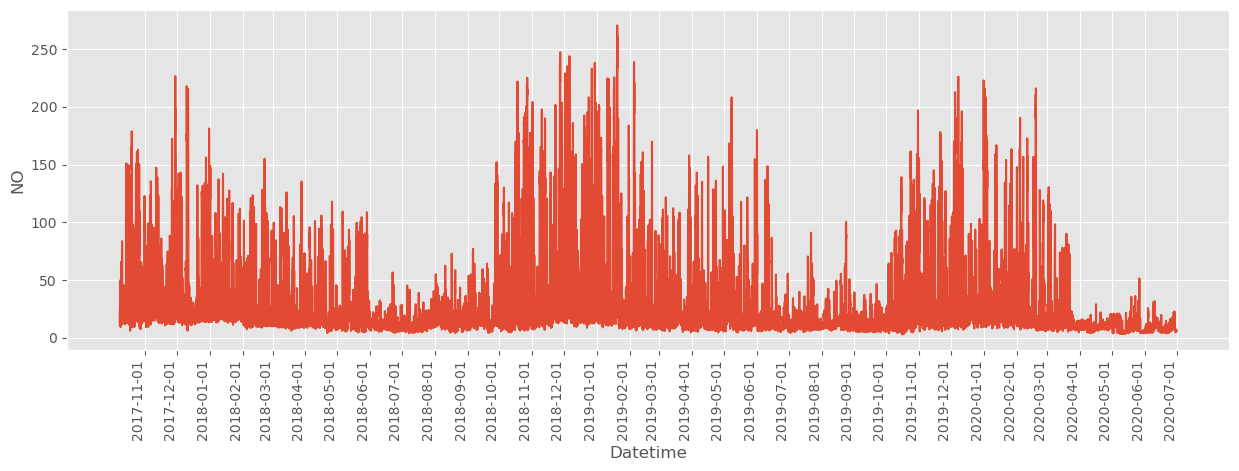

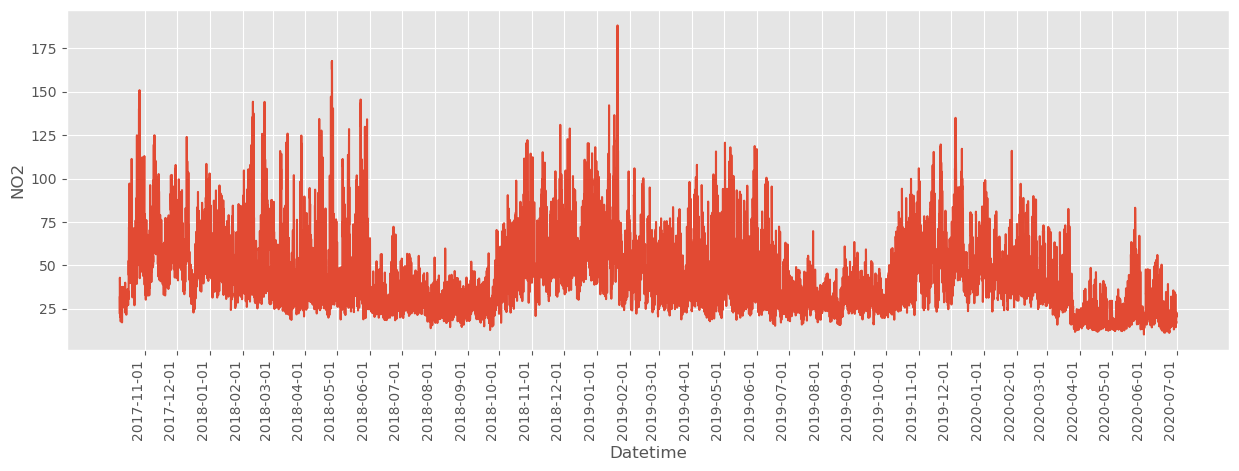

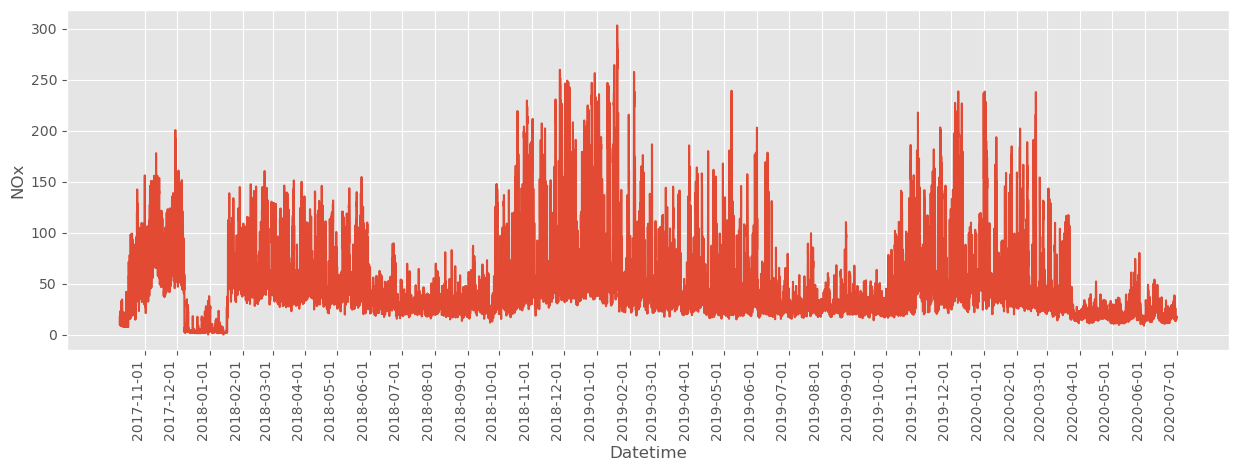

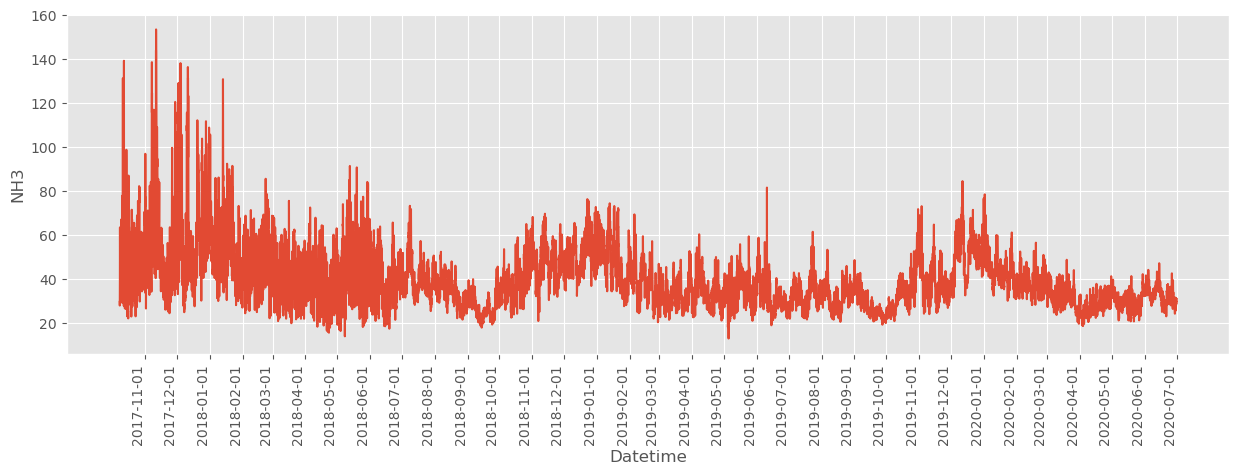

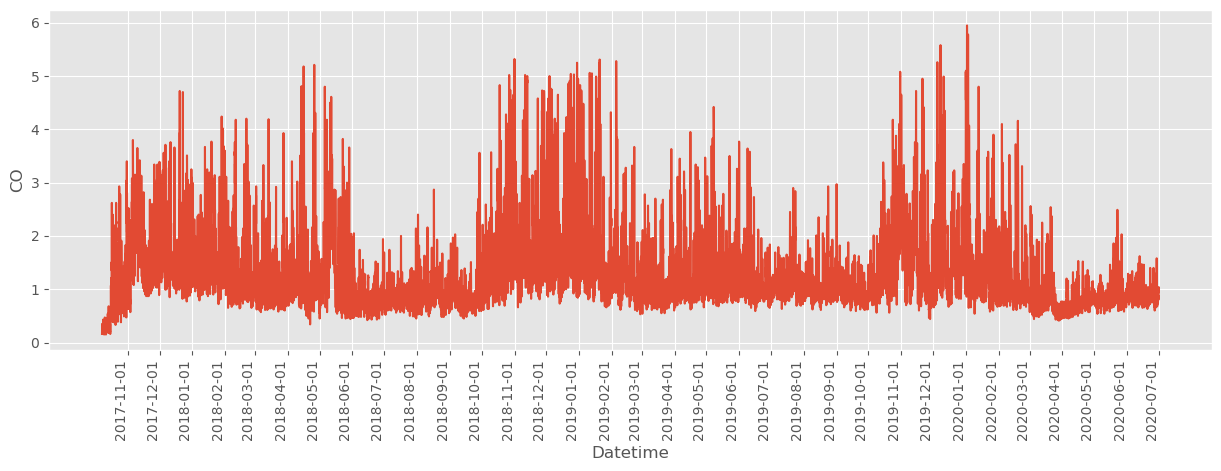

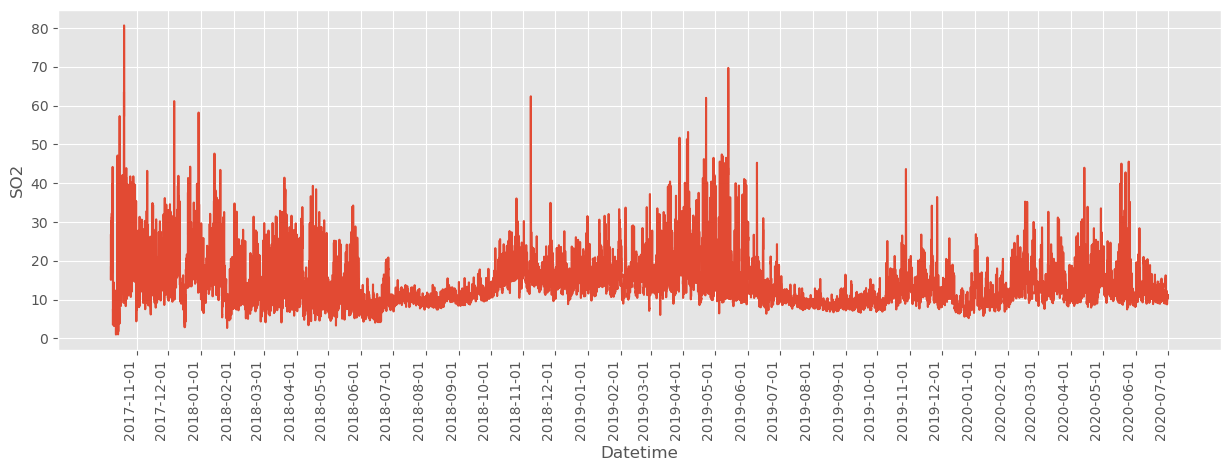

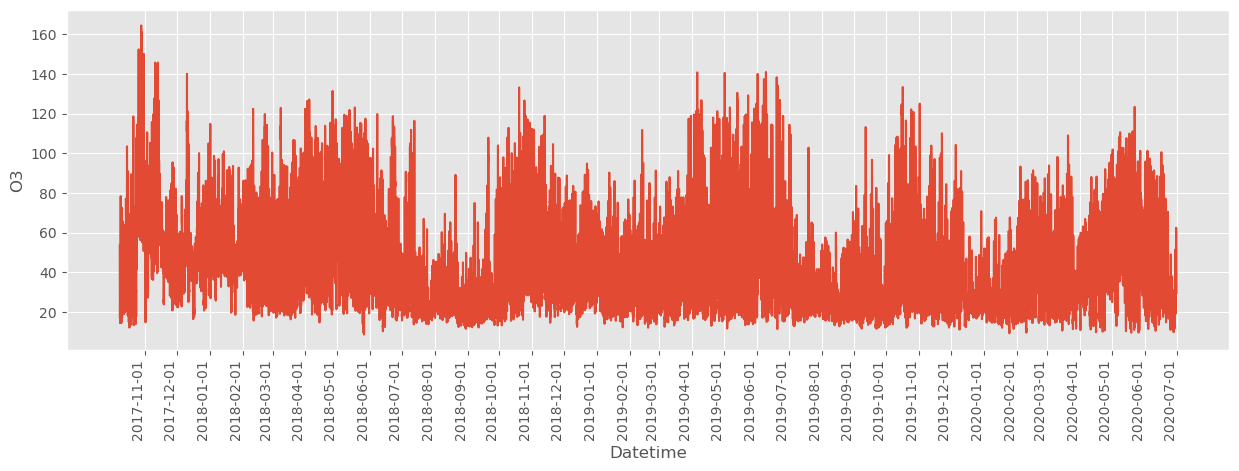

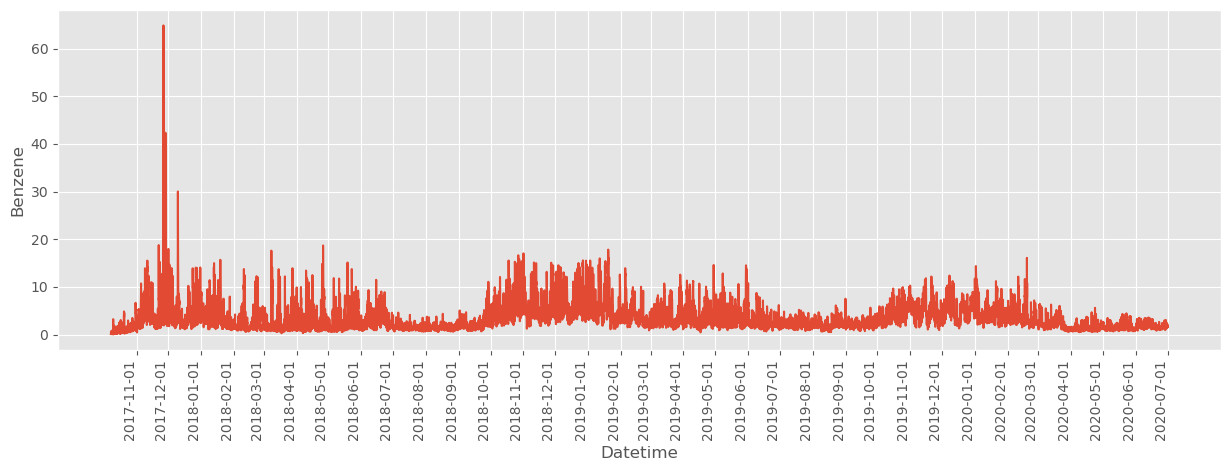

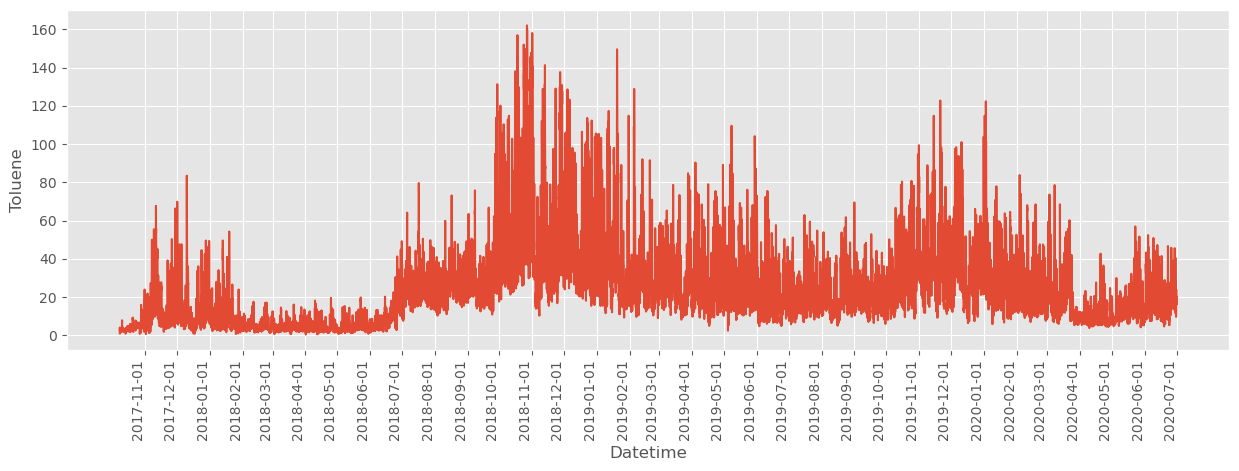

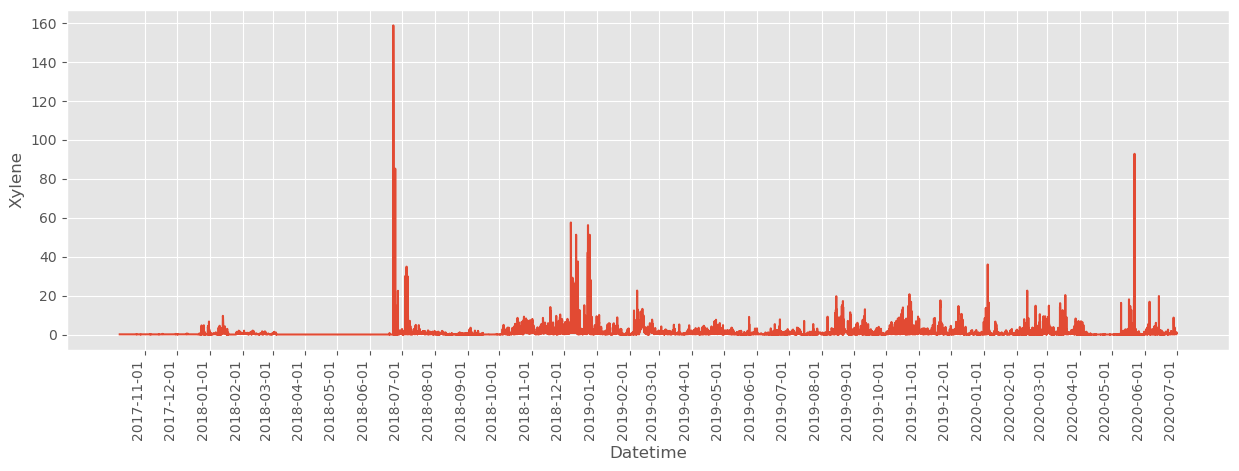

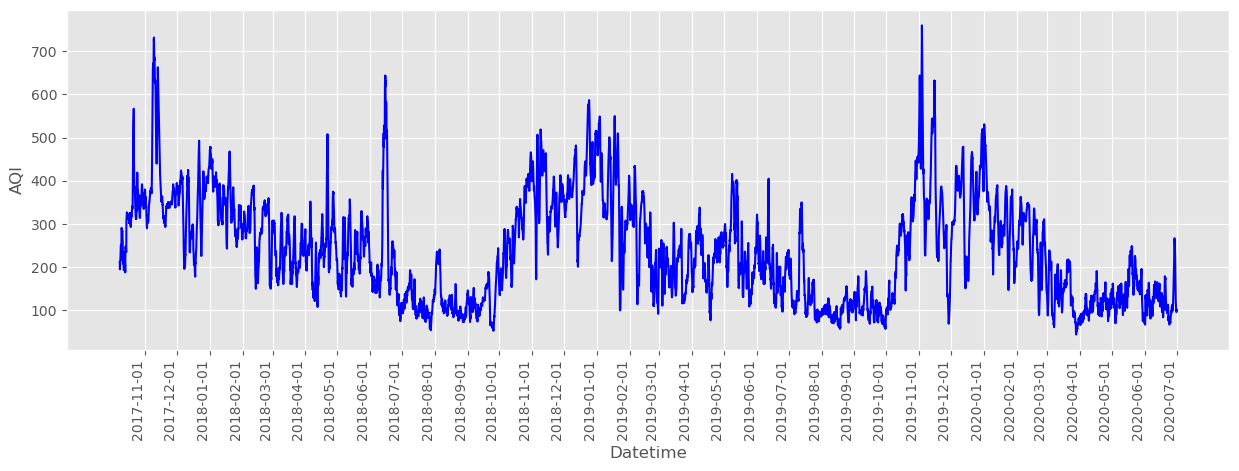

In [44]:
positions = [p for p in df.index
             if p.hour == 0
             and p.is_month_start
             and p.month in range(1, 13, 1)]

for i, col in enumerate(df.columns):
    plt.figure(i)
    if col != 'AQI':
        ax = df[col].plot(rot=90, figsize=(15,5), x_compat = True)
    else:
        ax = df[col].plot(rot=90, figsize=(15,5), color = 'blue', x_compat = True)
    
    #ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_xticks(positions)
    ax.set_ylabel(col)

In [ ]:
df["AQI"].plot(rot=90, figsize=(15,5))